## This module about methods of ensamble: Boosting and Stacking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 2.20.2ubuntu2 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [3]:
y = titanic['Survived']
X = titanic.drop(columns='Survived')
trees = [1] + list(range(10, 100, 10))

In [4]:
def evaluate(model):
    scoring = []
    for tree in trees:
        this_model = model(n_estimators=tree)
        score = cross_val_score(this_model, X, y, 
                                scoring='roc_auc', cv=3)
        scoring.append(score)
    return np.asmatrix(scoring)

In [5]:
boosts = [AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]

In [6]:
%%time
ada_scoring = evaluate(boosts[0])
ada_scoring

CPU times: user 1.63 s, sys: 7.13 ms, total: 1.64 s
Wall time: 1.64 s


matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [7]:
%%time
gbc_scoring = evaluate(boosts[1])
gbc_scoring

CPU times: user 1.01 s, sys: 598 µs, total: 1.01 s
Wall time: 1.01 s


matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83247052, 0.87364586, 0.88179465],
        [0.81703576, 0.8781996 , 0.8825616 ],
        [0.81777874, 0.87407727, 0.88186655],
        [0.81451922, 0.87098552, 0.88730707],
        [0.81399195, 0.86930783, 0.88344838],
        [0.80979772, 0.86978717, 0.88117151],
        [0.80972582, 0.8715128 , 0.87635414],
        [0.81341674, 0.87196817, 0.87501198]])

In [8]:
%%time
xgb_scroing = evaluate(boosts[2])
xgb_scroing

CPU times: user 26.8 s, sys: 162 ms, total: 27 s
Wall time: 3.65 s


matrix([[0.8108283 , 0.86564088, 0.87714505],
        [0.80967788, 0.89497651, 0.86614419],
        [0.81658039, 0.88625252, 0.86156648],
        [0.8127936 , 0.88191449, 0.8582111 ],
        [0.81324897, 0.87800786, 0.85694085],
        [0.81125971, 0.87865497, 0.85698878],
        [0.81056466, 0.87760042, 0.85646151],
        [0.81032499, 0.87386157, 0.86183012],
        [0.80816796, 0.8758748 , 0.85881028],
        [0.80792829, 0.87395743, 0.85665325]])

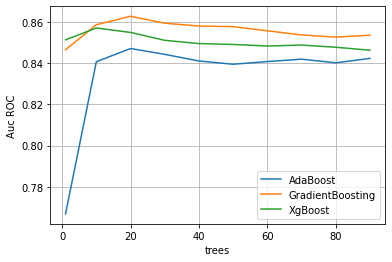

In [9]:
plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scroing.mean(axis=1), label='XgBoost')
plt.grid(True)
plt.legend()
plt.xlabel('trees')
plt.ylabel('Auc ROC')
plt.show()

## practice by boost

Когда дело доходит до оптимизации алгоритма, зачастую достаточно сложно подобрать сразу такие параметры, при которых качество классификатора было бы максимальным. В этом помогает либо опыт работы с различными методами, либо уже отмеченные другими специалистами взаимосвязи между количеством данных, самим алгоритмом, различными гиперпараметрами и т.п.

В случае с бустингом было отмечено, что количество деревьев, при котором качество алгоритма максимально, зависит от темпа обучения: чем меньше темп, тем больше деревьев обычно требуется. 

В этом задании попробуйте последовательно подобрать такие гиперпараметры n_estimators и learning_rate в алгоритме GBC, чтобы accuracy была равна 1: сначала последовательно увеличивайте количество базовых деревьев, не меняя при этом learning_rate, а затем поменяйте количество деревьев снова на 1 и уже меняйте гиперпараметр learning_rate в пределах (0, 1), не включая границы. Если  accuracy не будет равна 1 при граничном значении learning_rate, добавляйте по одному базовому алгоритму и смотрите, что получится (напомним, что зависимость нелинейная - при значительном увеличении learning_rate количество деревьев может увеличиться всего на одну-две позиции.

Сначала запустите следующий код со сгенерированными данными.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

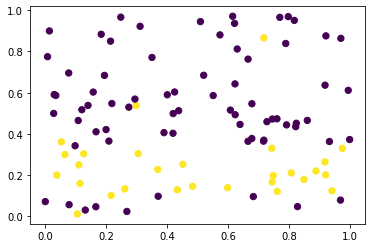

In [11]:
np.random.seed(15)
data = np.random.rand(100, 2)
targets = np.empty(100)
targets[1 / data[:, 1] > 2] = 1
targets[1 / data[:, 1] < 3] = 0
targets[1 / data[:, 1] > 10] = 0
targets[[1, 3, 6, 15, 36]] = 1

plt.scatter(data[:, 0], data[:, 1], s=40, c=targets)

In [12]:
score_estimators = []


for n_estimator in range(1, 100):
    gbc_model = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=0.1).fit(data, targets)
    predicted = gbc_model.predict(data)
    accuracy = accuracy_score(targets, predicted)
    score_estimators.append([n_estimator, accuracy])
    if accuracy == 1:
        print('best_estimators:', gbc_model)
        break


best_estimators: GradientBoostingClassifier(n_estimators=33)


In [13]:
score_learing_rates = []    
for learning_rate in np.arange(0.1, 1, 0.1):
    gbc_model = GradientBoostingClassifier(n_estimators=1, learning_rate=learning_rate).fit(data, targets)
    predicted = gbc_model.predict(data)
    accuracy = accuracy_score(targets, predicted)
    score_learing_rates.append([learning_rate, accuracy])
    if accuracy == 1:
        print('best2:', gbc_model)
        break
print('best_learning', max(score_learing_rates, key=lambda x: x[1]))

best_learning [0.30000000000000004, 0.98]


In [14]:
%%time
score_estimators_with_learn03 = []
for n_estimator in range(1, 100):
    gbc_model = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=0.3).fit(data, targets)
    predicted = gbc_model.predict(data)
    accuracy = accuracy_score(targets, predicted)
    score_estimators_with_learn03.append([n_estimator, accuracy])
    if accuracy == 1:
        print('best:', gbc_model)
        break
    

best: GradientBoostingClassifier(learning_rate=0.3, n_estimators=10)
CPU times: user 40.5 ms, sys: 16 µs, total: 40.5 ms
Wall time: 39.1 ms


In [15]:
score_estimators = np.array(score_estimators)
score_learing_rates = np.array(score_learing_rates)
score_estimators_with_learn03 = np.array(score_estimators_with_learn03)

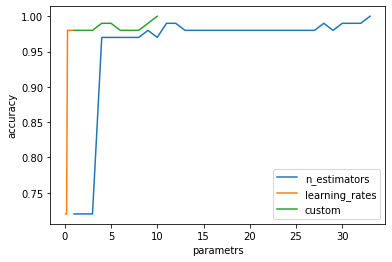

In [16]:
plt.plot(score_estimators[:, 0], score_estimators[:, 1], label='n_estimators')
plt.plot(score_learing_rates[:, 0], score_learing_rates[:, 1], label='learning_rates')
plt.plot(score_estimators_with_learn03[:, 0], score_estimators_with_learn03[:, 1], label='custom')
plt.xlabel('parametrs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
score_learing_rates[2]

array([0.3 , 0.98])

In [18]:
np.array(score_estimators)[:, 0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33.])

## homework for module pf emsemble

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


import pandas as pd

0    501
1    499
dtype: int64


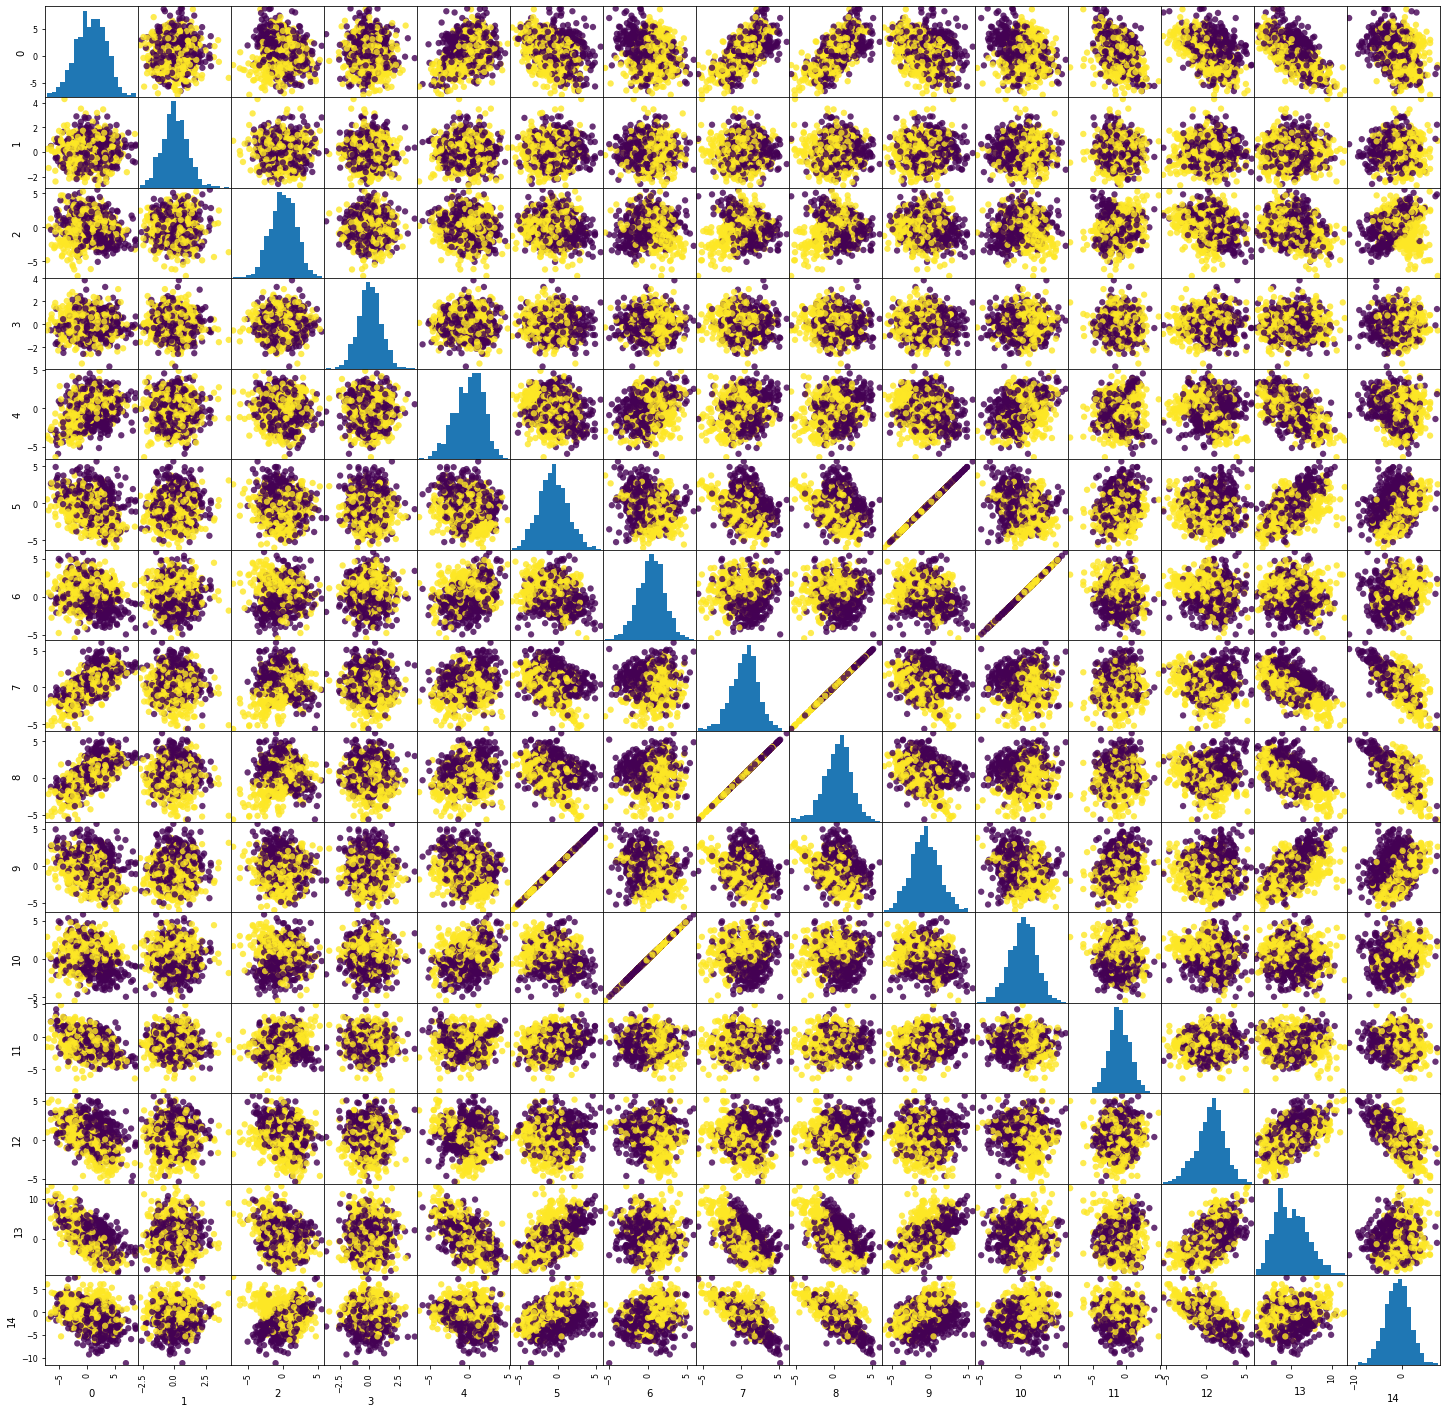

In [20]:
x, y = make_classification(n_samples=1000,
                           n_features=15, 
                           n_informative=7, n_redundant=3, n_repeated=3, random_state=17)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)
features = pd.DataFrame(x)
target = pd.Series(y)
print(target.value_counts())

scat_mtrx = pd.plotting.scatter_matrix(features,
                                       c=target,
                                       figsize=(25, 25),
                                       marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [21]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}
num_rounds = 20
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

[0]	train-logloss:0.65325	test-logloss:0.66343
[1]	train-logloss:0.62012	test-logloss:0.63856
[2]	train-logloss:0.59225	test-logloss:0.61802
[3]	train-logloss:0.56655	test-logloss:0.59999
[4]	train-logloss:0.54443	test-logloss:0.58840
[5]	train-logloss:0.52526	test-logloss:0.57064
[6]	train-logloss:0.50836	test-logloss:0.55665
[7]	train-logloss:0.49023	test-logloss:0.54734
[8]	train-logloss:0.47380	test-logloss:0.53869
[9]	train-logloss:0.45862	test-logloss:0.53187
[10]	train-logloss:0.44627	test-logloss:0.51961
[11]	train-logloss:0.43366	test-logloss:0.51053
[12]	train-logloss:0.42058	test-logloss:0.50064
[13]	train-logloss:0.40988	test-logloss:0.49537
[14]	train-logloss:0.40141	test-logloss:0.48768
[15]	train-logloss:0.39375	test-logloss:0.48188
[16]	train-logloss:0.38457	test-logloss:0.47386
[17]	train-logloss:0.37775	test-logloss:0.47245
[18]	train-logloss:0.37156	test-logloss:0.46815
[19]	train-logloss:0.36540	test-logloss:0.46157


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

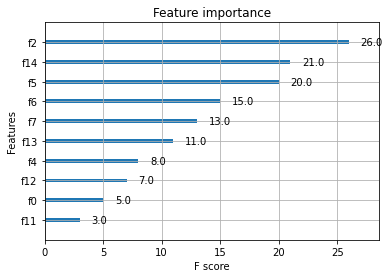

In [22]:
xgb.plot_importance(xgb_model)

In [26]:
x, y = make_classification(n_samples=1000, n_features=7,
                           n_informative=3, n_redundant=3, 
                           n_classes=2, weights=[.9, .1],
                           random_state=20)
features = pd.DataFrame(x)
targets = pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=20)
print(targets.value_counts())

0    896
1    104
dtype: int64


In [154]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 1}
num_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

print('\n')
predicted = xgb_model.predict(dtest) > 0.5
cm = confusion_matrix(y_test, predicted, labels=[1, 0], )
print(cm)
print('precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

[0]	train-logloss:0.26413	test-logloss:0.30880
[1]	train-logloss:0.15144	test-logloss:0.24299
[2]	train-logloss:0.12956	test-logloss:0.23367
[3]	train-logloss:0.10708	test-logloss:0.22210
[4]	train-logloss:0.08907	test-logloss:0.21151
[5]	train-logloss:0.07864	test-logloss:0.22941
[6]	train-logloss:0.06794	test-logloss:0.22334
[7]	train-logloss:0.06096	test-logloss:0.20994
[8]	train-logloss:0.05003	test-logloss:0.20906
[9]	train-logloss:0.04639	test-logloss:0.21061


[[ 25  14]
 [  5 256]]
precision:  0.8333333333333334
recall:  0.6410256410256411


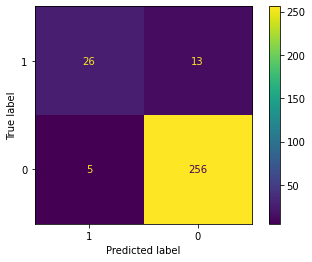

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=[1, 0])
disp.plot()
plt.show()

In [155]:
# change weight with hand
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5



dtrain = xgb.DMatrix(x_train, y_train, weight=weights)
dtest = xgb.DMatrix(x_test, y_test)
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 1}
num_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

print('\n')
predicted = xgb_model.predict(dtest) > 0.5
cm = confusion_matrix(y_test, predicted, labels=[1, 0], )
print(cm)
print('precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

[0]	train-logloss:0.34705	test-logloss:0.32925
[1]	train-logloss:0.22954	test-logloss:0.24404
[2]	train-logloss:0.18897	test-logloss:0.25488
[3]	train-logloss:0.14780	test-logloss:0.23705
[4]	train-logloss:0.12850	test-logloss:0.21703
[5]	train-logloss:0.10893	test-logloss:0.20647
[6]	train-logloss:0.09107	test-logloss:0.20868
[7]	train-logloss:0.07710	test-logloss:0.20870
[8]	train-logloss:0.06994	test-logloss:0.21683
[9]	train-logloss:0.06268	test-logloss:0.21690


[[ 29  10]
 [ 12 249]]
precision:  0.7073170731707317
recall:  0.7435897435897436


In [157]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

#balanced
scale = pd.value_counts(y_train)
scale_weight = scale[0] / scale[1]

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 1,
          'scale_pos_weight': scale_weight}
num_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

print('\n')
predicted = xgb_model.predict(dtest) > 0.5
cm = confusion_matrix(y_test, predicted, labels=[1, 0], )
print(cm)
print('precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

[0]	train-logloss:0.37263	test-logloss:0.36848
[1]	train-logloss:0.22881	test-logloss:0.28310
[2]	train-logloss:0.20647	test-logloss:0.24196
[3]	train-logloss:0.16875	test-logloss:0.23563
[4]	train-logloss:0.13292	test-logloss:0.24015
[5]	train-logloss:0.10590	test-logloss:0.22858
[6]	train-logloss:0.08802	test-logloss:0.22758
[7]	train-logloss:0.07510	test-logloss:0.22404
[8]	train-logloss:0.06695	test-logloss:0.23958
[9]	train-logloss:0.05316	test-logloss:0.23974


[[ 28  11]
 [ 11 250]]
precision:  0.717948717948718
recall:  0.717948717948718


## Task of Working with stacking and blending

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

In [7]:
titanic = pd.read_csv('titanic.csv')
targets = titanic.Survived
data = titanic.drop(columns='Survived')

x_train, x_test, y_train, y_test = train_test_split(data, targets,
                                                    train_size=0.8,
                                                    random_state=0)

In [13]:
train, valid, train_true, valid_true = train_test_split(x_train,
                                                        y_train,
                                                        train_size=0.5,
                                                        random_state=0)

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(train, train_true)

lr = LogisticRegression(random_state=17, max_iter=120)
lr_model = lr.fit(train, train_true)

dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)
dtc_model = dtc.fit(train, train_true)

svc = SVC(random_state=17)
svc_model = svc.fit(train, train_true)

In [59]:
models = [knn_model, lr_model, dtc_model, svc_model]
# (count of objects, algorithms)
meta_mtrx = np.empty((valid.shape[0], len(models)))
meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 

#meta features of train data for meta-algorithm
for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(valid)
    #Check score by base model
    predicted = model.predict(x_test)
    print(f'{n} auc: {roc_auc_score(y_test, predicted)} \n{model=}\n')

    #meta test features of test data for meta-algorithm
for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(x_test)

    
meta_model = XGBClassifier(n_estimators=40).fit(meta_mtrx, valid_true)
meta_predict = meta_model.predict(meta_mtrx_test)
print(f'Stacking AUC: {roc_auc_score(y_test, meta_predict)}')

0 auc: 0.7080368906455863 
model=KNeighborsClassifier(n_neighbors=3)

1 auc: 0.8094861660079051 
model=LogisticRegression(max_iter=120, random_state=17)

2 auc: 0.7877470355731225 
model=DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)

3 auc: 0.6538866930171279 
model=SVC(random_state=17)

Stacking AUC: 0.7868906455862978


In [46]:
dtc_model

LogisticRegression(max_iter=150, random_state=17)